## L1 and L2 Regularization Example

In [33]:
### Importing the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [9]:
# Loading data from python inbuilt dataaset
housing = fetch_california_housing()
type(housing)

sklearn.utils._bunch.Bunch

In [13]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [15]:
housing_df =pd.DataFrame(housing.data)
housing_df.columns = housing.feature_names
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
housing_df.shape

(20640, 8)

In [18]:
housing_target = housing.target
type(housing_target)

numpy.ndarray

In [19]:
len(housing_target)

20640

In [22]:
housing_df['MedHouseVal'] = housing_target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
### Drop the target coloumn and assign to Y variable
X = housing_df.drop(columns='MedHouseVal')
Y = housing_df['MedHouseVal']

In [24]:
### Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

R squared for simple linear regression is  0.6101543117530047
     Features  Coefficient_values
0      MedInc            0.425767
1    HouseAge            0.009292
2    AveRooms           -0.088898
3   AveBedrms            0.542158
4  Population           -0.000003
5    AveOccup           -0.003190
6    Latitude           -0.427871
7   Longitude           -0.440357


<BarContainer object of 8 artists>

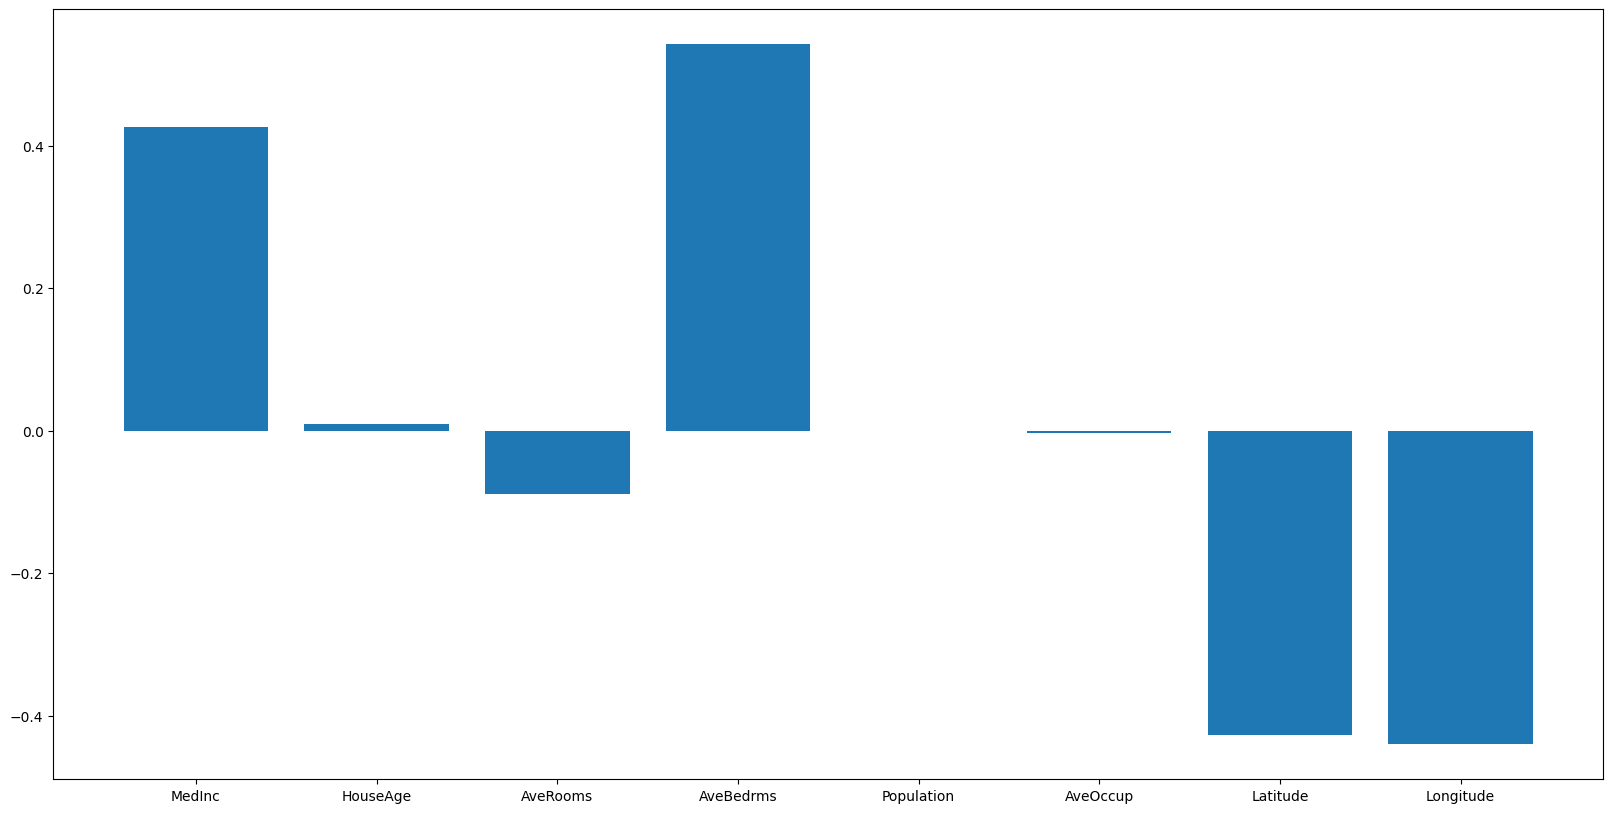

In [37]:
## apply simple linear regression
LR =LinearRegression()
LR.fit(X_train,Y_train)

## predict on test dataset
pred_y = LR.predict(X_test)

### Calculate r-square value
r2_lr = r2_score(Y_test, pred_y)
print("R squared for simple linear regression is ", r2_lr)

### Putting together the cofficients of the features.
coff_df = pd.DataFrame()
coff_df['Features'] = X_train.columns
coff_df['Coefficient_values'] = LR.coef_
print(coff_df)

## bar chart for the same
plt.figure(figsize = (20,10))
plt.bar(coff_df['Features'],coff_df['Coefficient_values'])

R squared for RIdge regression is  0.6101454707244383
     Features  Coefficient_values
0      MedInc            0.425712
1    HouseAge            0.009293
2    AveRooms           -0.088792
3   AveBedrms            0.541606
4  Population           -0.000003
5    AveOccup           -0.003190
6    Latitude           -0.427851
7   Longitude           -0.440328


<BarContainer object of 8 artists>

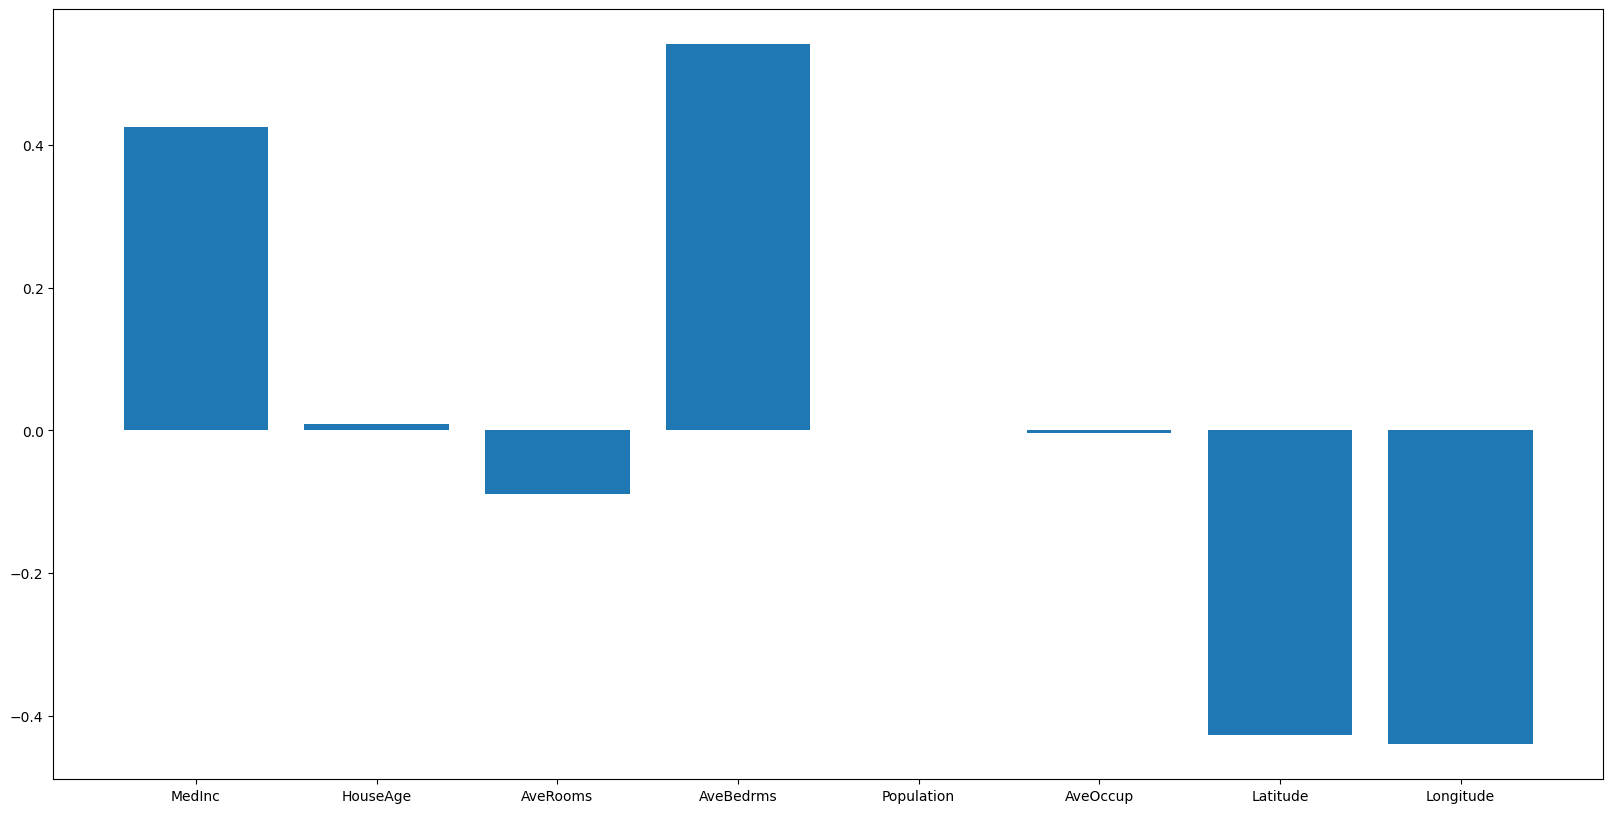

In [43]:
## apply Ridge regression

from sklearn.linear_model import Ridge

RR =Ridge(alpha = 0.5)
RR.fit(X_train,Y_train)

## predict on test dataset
pred_y = RR.predict(X_test)

### Calculate r-square value
r2_rr = r2_score(Y_test, pred_y)
print("R squared for RIdge regression is ", r2_rr)

### Putting together the cofficients of the features.
coff_df_rr = pd.DataFrame()
coff_df_rr['Features'] = X_train.columns
coff_df_rr['Coefficient_values'] = RR.coef_
print(coff_df_rr)

## bar chart for the same
plt.figure(figsize = (20,10))
plt.bar(coff_df_rr['Features'],coff_df_rr['Coefficient_values'])

R squared for RIdge regression is  0.6101189732622624
     Features  Coefficient_values
0      MedInc            0.425548
1    HouseAge            0.009297
2    AveRooms           -0.088475
3   AveBedrms            0.539956
4  Population           -0.000003
5    AveOccup           -0.003190
6    Latitude           -0.427789
7   Longitude           -0.440240


<BarContainer object of 8 artists>

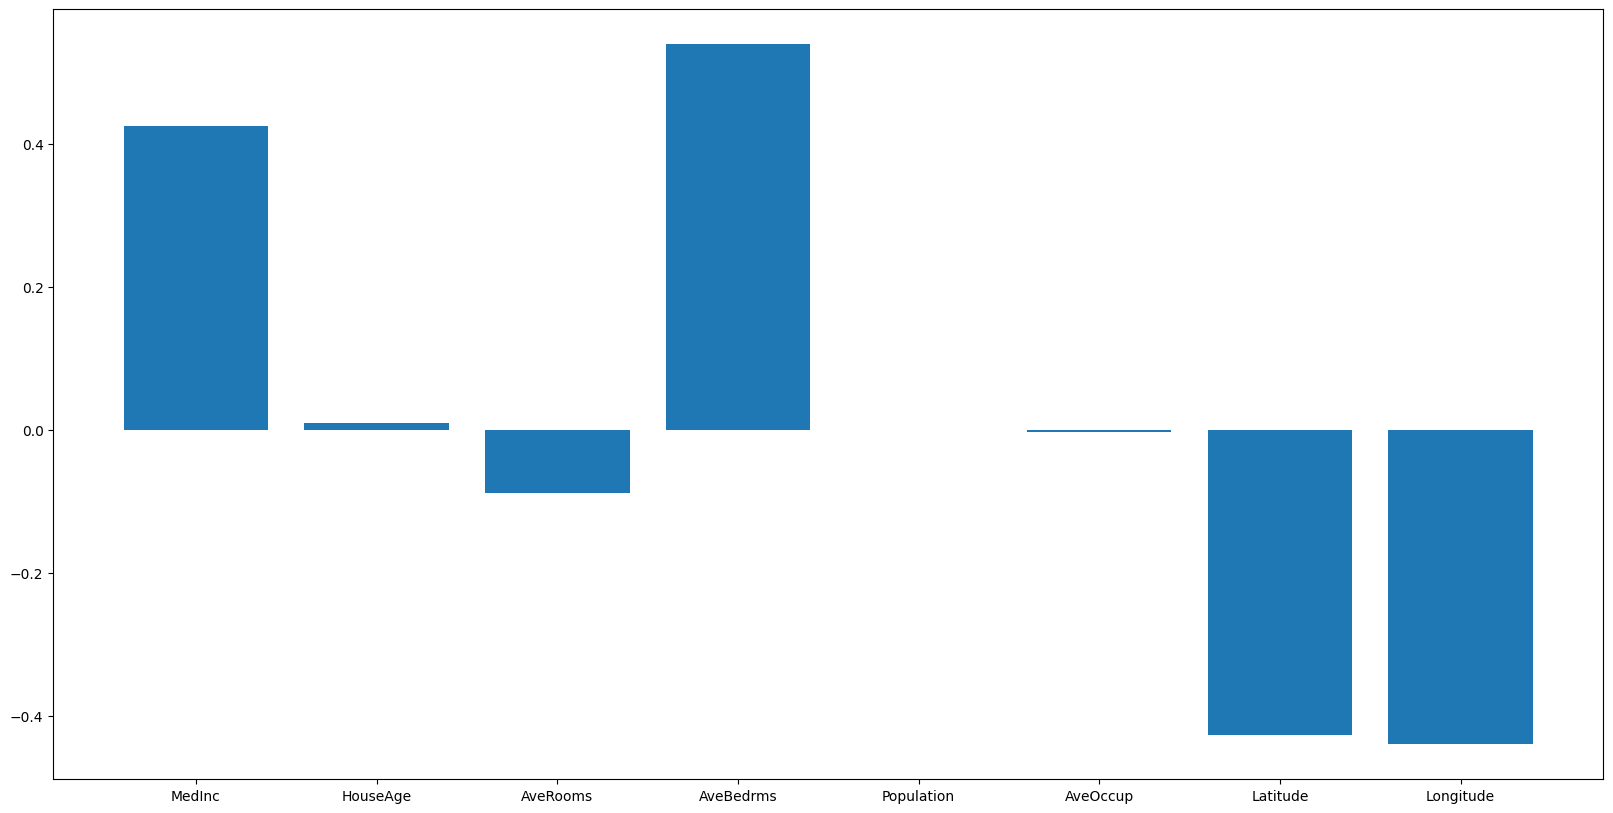

In [47]:
## apply Ridge regression

from sklearn.linear_model import Ridge

RR =Ridge(alpha = 2)
RR.fit(X_train,Y_train)

## predict on test dataset
pred_y = RR.predict(X_test)

### Calculate r-square value
r2_rr = r2_score(Y_test, pred_y)
print("R squared for RIdge regression is ", r2_rr)

### Putting together the cofficients of the features.
coff_df_rr = pd.DataFrame()
coff_df_rr['Features'] = X_train.columns
coff_df_rr['Coefficient_values'] = RR.coef_
print(coff_df_rr)

## bar chart for the same
plt.figure(figsize = (20,10))
plt.bar(coff_df_rr['Features'],coff_df_rr['Coefficient_values'])

### No much change in the neither the accuracy nor the cofficients for Ridge Regression since the cofficients are too small. and both simple linear regression and Ridge are smoother models

R squared for Lasso regression is  0.4505910668658386
     Features  Coefficient_values
0      MedInc            0.287297
1    HouseAge            0.012212
2    AveRooms            0.000000
3   AveBedrms           -0.000000
4  Population            0.000010
5    AveOccup           -0.000022
6    Latitude           -0.000000
7   Longitude           -0.000000


<BarContainer object of 8 artists>

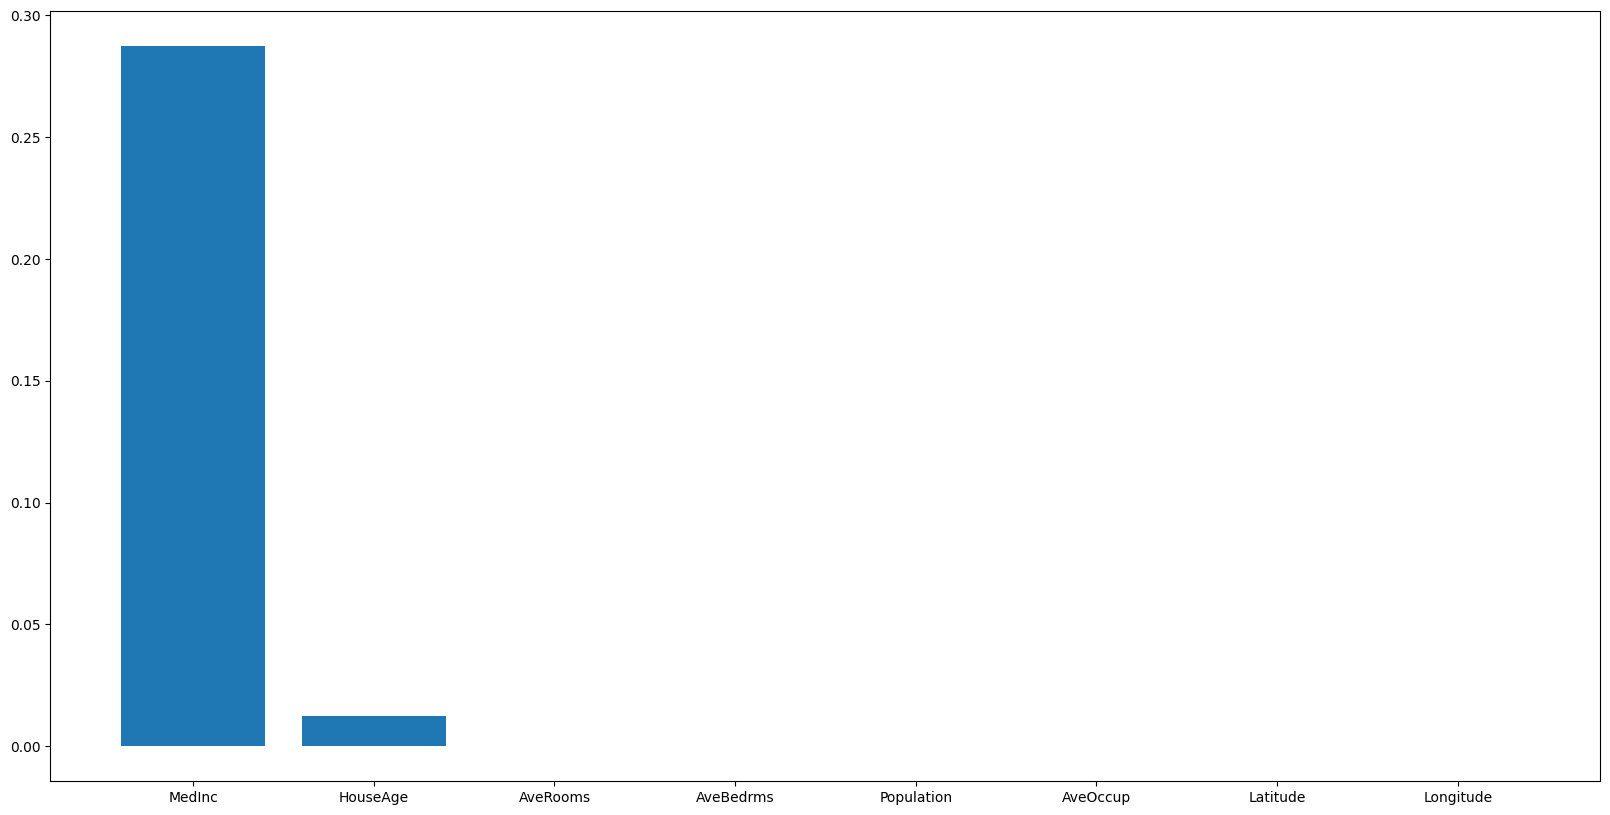

In [46]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

LassoR =Lasso(alpha = 0.5)
LassoR.fit(X_train,Y_train)

## predict on test dataset
pred_y = LassoR.predict(X_test)

### Calculate r-square value
r2_LassoR = r2_score(Y_test, pred_y)
print("R squared for Lasso regression is ", r2_LassoR)

### Putting together the cofficients of the features.
coff_df_LassoR = pd.DataFrame()
coff_df_LassoR['Features'] = X_train.columns
coff_df_LassoR['Coefficient_values'] = LassoR.coef_
print(coff_df_LassoR)

## bar chart for the same
plt.figure(figsize = (20,10))
plt.bar(coff_df_LassoR['Features'],coff_df_LassoR['Coefficient_values'])

### the accuracy of the model has reduced and many of the features became 0. Hence we can use Lasso regression as a Feature selector as well. Like ex : before applying the random forest we can use the Lasso regression and find out the features which are not important and train the model after removing those parameters.